In [1]:
import telegram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd

In [9]:
bot_name = 'z-shaimuirat_report'
bot_nickname = '@shaimurat_report_bot'

In [ ]:
https://api.telegram.org/bot7044101108:AAETY0C2dU2iAJAV-N7y497ztoXxCBloq2E/getUpdates

In [2]:
from read_db.CH import Getch

In [3]:
token = '7044101108:AAETY0C2dU2iAJAV-N7y497ztoXxCBloq2E'
bot = telegram.Bot(token=token) # получаем доступ

In [6]:
updates = bot.getUpdates()

In [7]:
print(updates)

[]


In [8]:
print(updates[-1]['message']['chat']['id'])

IndexError: list index out of range

In [ ]:
-938659451

In [203]:
chat_id = 1027001565
group_chat_id = -938659451

In [16]:
msg = 'Hello'
bot.sendMessage(chat_id = chat_id, text = msg)

{'message': 
     {'new_chat_members': [], 
      'new_chat_photo': [], 
      'entities': [], 
      'message_id': 3, 
      'caption_entities': [], 
      'text': 'Hi', 

      'group_chat_created': False, 
      'supergroup_chat_created': False, 
      'delete_chat_photo': False, 
      'date': 1722246202, 
      'photo': [], 
  'chat': 
      {'id': 1027001565, 
       'type': 'private', 
       'last_name': 'Shaimurat', 
       'username': 'zhaskanatshaimurat', 
       'first_name': 'Zhaskanat'}, 
  'channel_chat_created': False, 
  'from': {
      'last_name': 'Shaimurat', 
      'username': 'zhaskanatshaimurat', 
      'id': 1027001565, 'language_code': 'ru',
      'first_name': 'Zhaskanat', 
      'is_bot': False}}, 
 'update_id': 392716689}

In [20]:
x = np.arange(1, 10, 1)
y = np.random.choice(5, len(x))
sns.lineplot(x, y)
plt.title('test plot')

plot_object = io.BytesIO()
plt.savefig(plot_object)
plot_object.seek(0)
plot_object.name = 'test_plot.png'
plt.close()
bot.sendPhoto(chat_id=chat_id, photo=plot_object)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [78]:
data = Getch('select * from simulator.feed_actions where toDate(time) = today() limit 100').df
file_object = io.StringIO()
data.to_csv(file_object)
file_object.name = 'test_file.csv'
file_object.seek(0)
bot.sendDocument(chat_id=chat_id, document=file_object)

# Отчет по ленте

1) текст с информацией о значениях ключевых метрик за предыдущий день<br>
2) график с значениями метрик за предыдущие 7 дней

Отобразите в отчете следующие ключевые метрики: 
-  DAU 
-  Просмотры
-  Лайки
-  CTR

In [154]:
import pandas as pd
from datetime import datetime, timedelta

In [155]:
import pandahouse

In [156]:
query = """SELECT toDate(time) as event_date, 
COUNT(DISTINCT user_id) AS users,
countIf(action='like') AS likes, 
       countIf(action='view') AS views,
       countIf(action='like')/countIf(action='view') AS CTR
FROM simulator_20240620.feed_actions
WHERE (toDate(time) >= today() - 7) and (toDate(time) < today())
GROUP BY event_date
"""

In [157]:
data = Getch(query).df

In [158]:
yesterday = datetime.now() - timedelta(days=1)
yesterday = yesterday.date()

In [159]:
yesterday_df = data[data['event_date'].dt.date == yesterday].reset_index()

In [160]:
yesterday_df

,index,event_date,users,likes,views,CTR
0,6,2024-07-29,19172,105911,507991,0.20849


In [161]:
message = f"Метрики за {yesterday_df['event_date'].iloc[0].date()}\n\
Кол-во пользователей: {yesterday_df['users'].iloc[0]}\n\
Лайки: {yesterday_df['likes'].iloc[0]}\n\
Просмотры: {yesterday_df['views'].iloc[0]}\n\
CTR: {yesterday_df['CTR'].iloc[0]}"

In [162]:
bot.sendMessage(chat_id = chat_id, text = message)

In [163]:
data

,event_date,users,likes,views,CTR
0,2024-07-23,18438,151832,717487,0.211616
1,2024-07-24,18673,169223,785880,0.215329
2,2024-07-25,18594,156103,722608,0.216027
3,2024-07-26,18300,152089,704717,0.215816
4,2024-07-27,18729,159808,749646,0.213178
5,2024-07-28,19017,131578,633584,0.207673
6,2024-07-29,19172,105911,507991,0.208490


Text(0.5, 1.0, 'Amount of users in previous week')

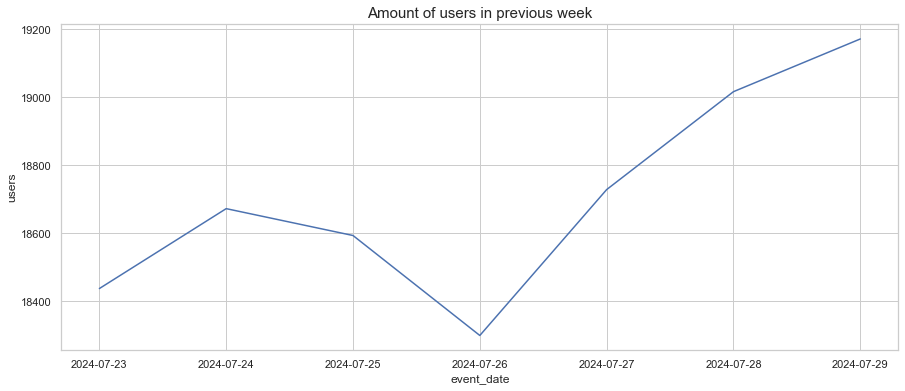

In [192]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data=data, x='event_date', y='users')
plt.title('Amount of users in previous week', fontsize=15)          

In [212]:
def send_graphics_messages(data, x_column, y_column, plot_title, plot_object_name):
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=data, x=x_column, y=y_column)
    plt.title(plot_title, fontsize=15)  

    plot_object = io.BytesIO()
    plt.savefig(plot_object)
    plot_object.seek(0)
    plot_object.name = plot_object_name
    plt.close()
    bot.sendPhoto(chat_id=chat_id, photo=plot_object)

In [213]:
send_graphics_messages(data, 'event_date', 'users', 'Amount of users in previous week', 'Amount of users in previous week.png')
send_graphics_messages(data, 'event_date', 'likes', 'Amount of likes in previous week', 'Amount of likes in previous week.png')
send_graphics_messages(data, 'event_date', 'views', 'Amount of views in previous week', 'Amount of views in previous week.png')
send_graphics_messages(data, 'event_date', 'CTR', 'Amount of CTR in previous week', 'Amount of CTR in previous week.png')

In [193]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data=data, x='event_date', y='users')
plt.title('Amount of users in previous week', fontsize=15)  

plot_object = io.BytesIO()
plt.savefig(plot_object)
plot_object.seek(0)
plot_object.name = 'Amount of users in previous week.png'
plt.close()
bot.sendPhoto(chat_id=chat_id, photo=plot_object)

In [195]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data=data, x='event_date', y='likes')
plt.title('Amount of likes in previous week', fontsize=15)  

plot_object = io.BytesIO()
plt.savefig(plot_object)
plot_object.seek(0)
plot_object.name = 'Amount of likes in previous week.png'
plt.close()
bot.sendPhoto(chat_id=chat_id, photo=plot_object)

In [196]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data=data, x='event_date', y='views')
plt.title('Amount of views in previous week', fontsize=15)  

plot_object = io.BytesIO()
plt.savefig(plot_object)
plot_object.seek(0)
plot_object.name = 'Amount of views in previous week.png'
plt.close()
bot.sendPhoto(chat_id=chat_id, photo=plot_object)

In [197]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data=data, x='event_date', y='CTR')
plt.title('Amount of CTR in previous week', fontsize=15)  

plot_object = io.BytesIO()
plt.savefig(plot_object)
plot_object.seek(0)
plot_object.name = 'Amount of CTR in previous week.png'
plt.close()
bot.sendPhoto(chat_id=chat_id, photo=plot_object)

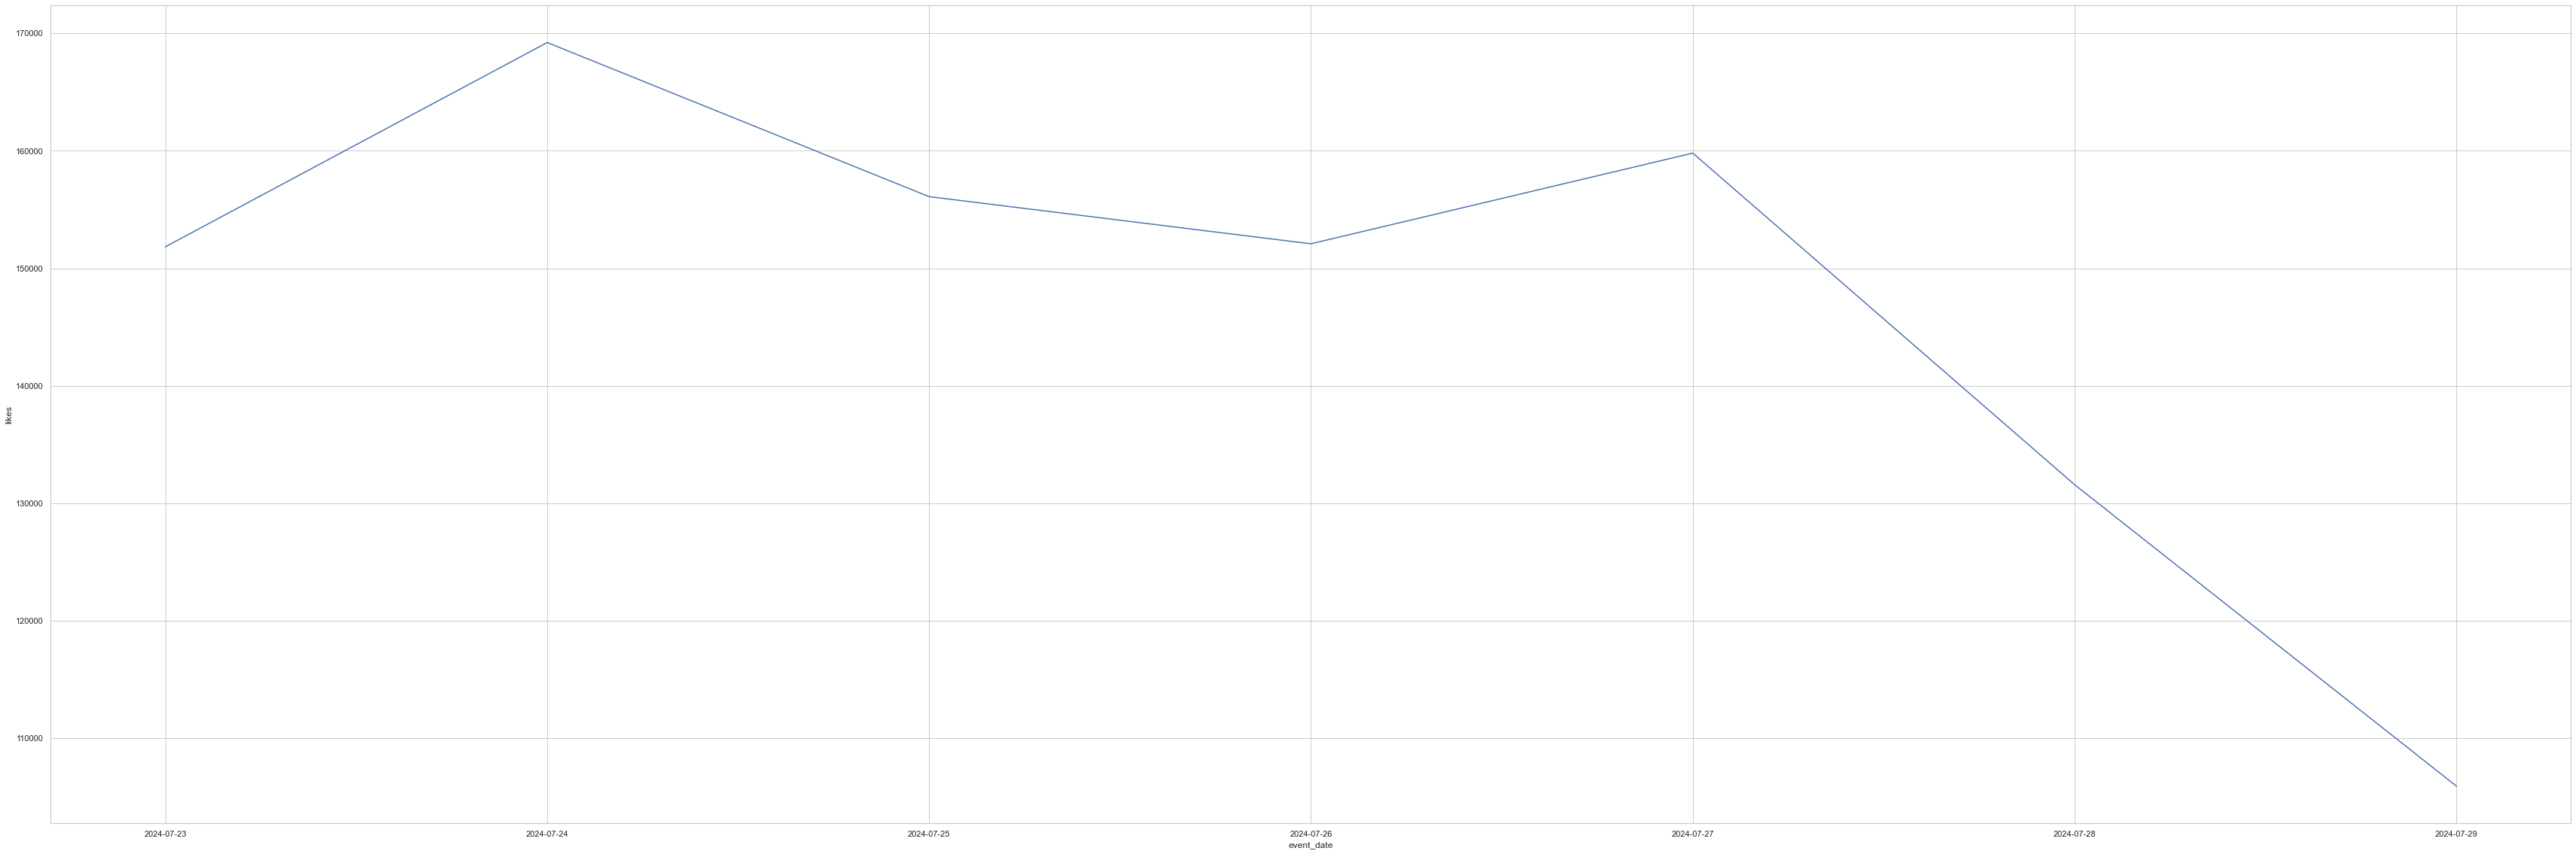

In [178]:
sns.lineplot(data=data, x='event_date', y='likes')
sns.set(rc={'figure.figsize':(60,10)}, style="whitegrid")

In [ ]:
3